In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm # Color maps
from projFuncs import *
from processImg import *
import PIL
from PIL import Image as Im

In [28]:
### Using geometrized units; c=G=1.

pixel_lengthi = 1 # pixel length for the initial image
pixel_lengthf = 1 # pixel length for the final image
x1 = -7 # location of where we observe the final image
x2 = 100 # location of the initial image. Keep it a positive number and the final image at a negative location for later parts of this program to work.
# make SURE that |x2| > |x1| so that using the bounds argument in the integrating function works.
y_bound = 100
z_bound = 100

In [29]:
initialImage = imageTakeInner('pixil-frame-0.png')
y_sizei, z_sizei, x_sizei = initialImage.shape
y_sizef = y_sizei
z_sizef = z_sizei
x_sizef = x_sizei # needs to be the same to transfer the information between the matrices.
finalImage = np.zeros(np.array([y_sizef, z_sizef, x_sizef]), dtype='int')

In [30]:
# intial image position values
y_positionsi = np.arange(0, y_sizei, 1)
z_positionsi = np.arange(0, z_sizei, 1)
y_positionsi = pixel_lengthi*(y_positionsi - y_sizei/2)
z_positionsi = pixel_lengthi*(z_positionsi - z_sizei/2)
y_centeri = pixel_lengthi*y_sizei/2
z_centeri = pixel_lengthi*z_sizei/2

In [31]:
# final image position values
y_positionsf = np.arange(0, y_sizef, 1)
z_positionsf = np.arange(0, z_sizef, 1)
y_positionsf = pixel_lengthf*(y_positionsf - y_sizef/2)
z_positionsf = pixel_lengthf*(z_positionsf - z_sizef/2)
y_centerf = pixel_lengthf*y_sizef/2
z_centerf = pixel_lengthf*z_sizef/2

In [32]:
print("Started.")
for i in range(y_sizef):
    for j in range(z_sizef):
        z = z_positionsf[j]
        y = y_positionsf[i]
        x = x1
        vx = 1
        vy = 0
        vz = 0
        u = integrate_EOM(np.array([x,y,z]), np.array([vx,vy,vz]),1,np.array([x2,y_bound + 1,z_bound + 1]))
        Uu = u[1:,-1,0] # ultimate
        if ((Uu[0] - x2) >= 0):
            k,l = findPixel(y_centeri, z_centeri, x2, pixel_lengthi, Uu[:3], Uu[3:])
            if ((k > -1) and (k < y_sizei) and (l > -1) and (l < z_sizei)):
                finalImage[i,j,:] = initialImage[k,l,:]
print("Finished.")

Started.
Finished.


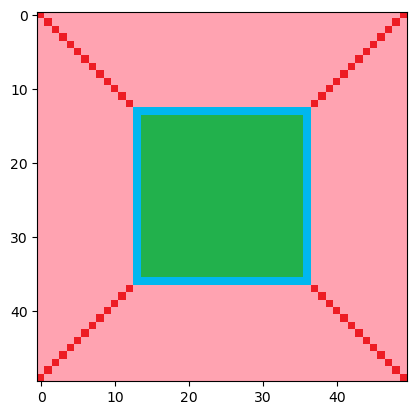

In [15]:
plt.imshow(initialImage)

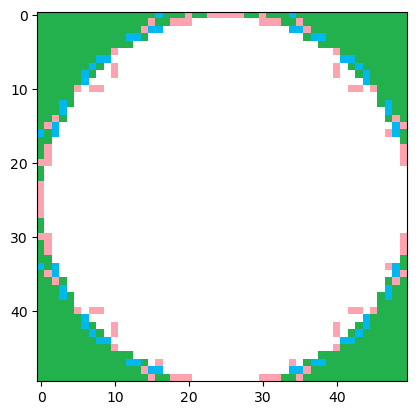

In [33]:
plt.imshow(finalImage)